# **The fourth in-class-exercise (40 points in total, 03/28/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


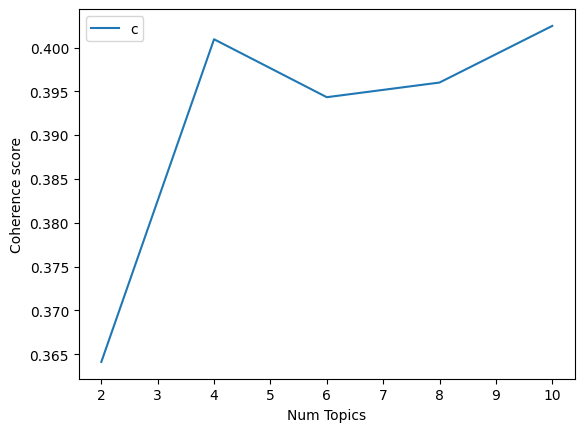

[0.3641098612926917, 0.4009419237110812, 0.39432833955160707, 0.3960010089352234, 0.4024647972161143]
0.4024647972161143
10
[(0, '0.071*"never" + 0.071*"often" + 0.071*"well"'), (1, '0.029*"drive" + 0.029*"health" + 0.029*"brocolli"'), (2, '0.029*"father" + 0.029*"say" + 0.029*"drive"'), (3, '0.089*"drive" + 0.089*"father" + 0.089*"brother"'), (4, '0.096*"father" + 0.096*"brother" + 0.096*"like"'), (5, '0.029*"drive" + 0.029*"good" + 0.029*"brocolli"'), (6, '0.029*"father" + 0.029*"say" + 0.029*"drive"'), (7, '0.089*"drive" + 0.089*"pressur" + 0.089*"suggest"'), (8, '0.223*"health" + 0.117*"good" + 0.117*"brocolli"'), (9, '0.029*"drive" + 0.029*"health" + 0.029*"brocolli"')]


In [3]:
# Write your code here


import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from nltk.corpus import stopwords
from gensim.models.coherencemodel import CoherenceModel
nltk.download('stopwords')
tokenizer = RegexpTokenizer(r'\w+')
en_stop = stopwords.words('english')
p_stemmer = PorterStemmer()
doc_a = "Apple is healthy. My brother likes to eat good brocolli, but not my fathers."
doc_b = "My father spends a lot of time driving my brother around to soccer practice."
doc_c = "Few doctors suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my father never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health."
doc_s = [doc_a, doc_b, doc_c, doc_d, doc_e]

def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        model = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics=5, id2word = dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values
texts = []

for i in doc_s:
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in en_stop]
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    texts.append(stemmed_tokens)
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
model_list, coherence_values = compute_coherence_values(dictionary, corpus, texts, 12,2,2)

import matplotlib.pyplot as plt
limit=12; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

num=max(coherence_values)
y=coherence_values.index(num)
y= (y+1)*2
print(coherence_values)
print(num)
print(y)
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=y, id2word = dictionary, passes=20)

print(ldamodel.print_topics(num_topics=y, num_words=3))

## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


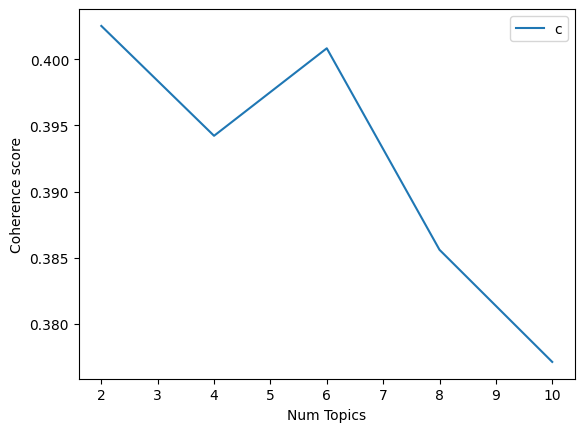

[0.4025286389077463, 0.3942197329237721, 0.40083727498615335, 0.38559921240178524, 0.37711951539097455]
0.4025286389077463
2
[(0, '0.397*"father" + 0.397*"brother" + 0.385*"drive"'), (1, '-0.413*"health" + -0.390*"brocolli" + -0.390*"good"')]


In [4]:
# Write your code here


import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from nltk.corpus import stopwords

nltk.download('stopwords')
tokenizer = RegexpTokenizer(r'\w+')
en_stop = stopwords.words('english')
p_stemmer = PorterStemmer()
doc_a = "Apple is healthy. My brother likes to eat good brocolli, but not my fathers."
doc_b = "My father spends a lot of time driving my brother around to soccer practice."
doc_c = "Few doctors suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my father never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health."
doc_s = [doc_a, doc_b, doc_c, doc_d, doc_e]
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        model = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics=5, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values
texts = []
for i in doc_s:
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in en_stop]
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    texts.append(stemmed_tokens)
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

model_list, coherence_values = compute_coherence_values(dictionary, corpus, texts, 12,2,2)

import matplotlib.pyplot as plt
limit=12; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
num=max(coherence_values)
y=coherence_values.index(num)
y= (y+1)*2
print(coherence_values)
print(num)
print(y)


lsamodel = gensim.models.lsimodel.LsiModel(corpus, num_topics=y, id2word = dictionary)  # train model
print(lsamodel.print_topics(num_topics=y, num_words=3))





## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [9]:
# Write your code here

import nltk; nltk.download('stopwords')
!python3 -m spacy download en



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2023-11-06 04:44:37.929853: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-06 04:44:37.929918: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-06 04:44:37.929967: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-06 04:44:39.233957: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 79.4 MB/s eta 0:00:00
✔ Download and installation succe

In [10]:
!pip install pyLDAvis==2.1.2
!pip install gensim==3.8.3
import re
import numpy as np
import pandas as pd
from pprint import pprint


import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


import spacy


import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline


import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

  Using cached gensim-3.8.3.tar.gz (23.4 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for gensim
  Running setup.py clean for gensim
Failed to build gensim
ERROR: Could not build wheels for gensim, which is required to install pyproject.toml-based projects


In [11]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [12]:
# Write your code here

import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r") as fin:
        for line in fin.readlines():
            text = line.strip()
            documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles

def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """

    tokenizer = RegexpTokenizer(r'\w+')
    en_stop = set(stopwords.words('english'))
    p_stemmer = PorterStemmer()
    texts = []
    for i in doc_set:
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        stopped_tokens = [i for i in tokens if not i in en_stop]
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        texts.append(stemmed_tokens)
    return texts


def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    dictionary = corpora.Dictionary(doc_clean)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    return dictionary,doc_term_matrix
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)

    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()





## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.

Based on the implementation of the models mentioned earlier, I believe the LDA model outperforms the LSA model in terms of accuracy. This is because LSA models often struggle to convey multiple interpretations of a word effectively. For example, consider the word "drive," which can have various meanings within the dataset used in the aforementioned analysis. It can refer to operating a car, as well as the act of pushing something. However, the LSA model may not adequately distinguish between these meanings, leading to potential confusion. The concepts of "driving well" and "broccoli" do not naturally align. In contrast, the LDA model excels at capturing these nuanced meanings and performs better than the LSA model in this regard. Therefore, when comparing the two models, the topics suggested by the LDA model tend to make more coherent sense.